In [1]:
from collections import Counter

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# 載入資料集

In [2]:
x, y = load_iris(return_X_y=True)
print(x.shape)
print(y.shape)

(150, 4)
(150,)


# 顯示資料分佈

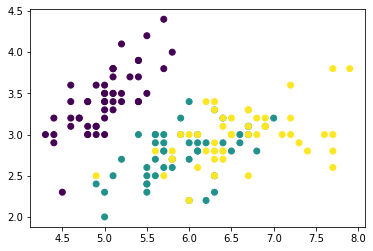

In [3]:
plt.scatter(x[:, 0], x[:, 1], c=y) # 特徵共有4維 僅用前2維作圖

# 拆分訓練與測試集

In [4]:
train_x, test_x, train_y, test_y = train_test_split(x, y)
print(train_x.shape)
print(train_y.shape)

(112, 4)
(112,)


# 主要算法實現

In [5]:
class KNN:
    def __init__(self, k):
        self.k = k # 通常設為奇數
        
    def fit(self, train_x, train_y):
        """無訓練過程"""
        self.train_x = train_x
        self.train_y = train_y
    
    def predict(self, test_x):
        """分別預測每個測試特徵的標籤"""
        return np.array([self._predict_single(single) for single in test_x])
    
    def _predict_single(self, single):
        """
        計算測試特徵與所有訓練特徵的距離
        根據距離與K得出鄰居特徵
        鄰居特徵中的多數標籤即為預測標籤
        """
        dists = np.linalg.norm(self.train_x - single, axis=1)
        labels = [label for _, label in sorted(zip(dists, self.train_y))][:self.k]
        return Counter(labels).most_common()[0][0]

In [6]:
knn = KNN(5)
knn.fit(train_x, train_y)

# 驗證算法準確率

In [7]:
predictions = knn.predict(test_x)
print("Accuracy:", (predictions == test_y).mean())

Accuracy: 0.9473684210526315


# 可視化驗證

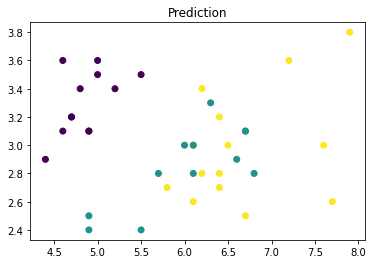

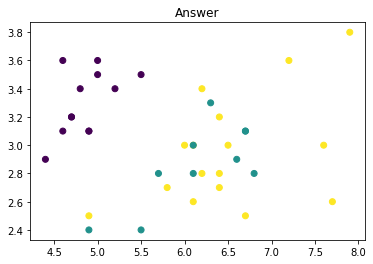

In [8]:
plt.title("Prediction")
plt.scatter(test_x[:, 0], test_x[:, 1], c=predictions)
plt.show()

plt.title("Answer")
plt.scatter(test_x[:, 0], test_x[:, 1], c=test_y)
plt.show()